In [1]:
%jsroot on

# Find peaks for calibration
The first thing we have to do is to calibrate the three scintillators. We do this by measuring gamma or X rays coming from known sources. In this way we can than calibrate the detectors relating the area of the signal measures at the output of the phototube with the energy of the incoming ray.

# Na source
The first source we look for is $^{22}Na$, a very radioactive source. This will allow us to easily calibrate the three detectors. Here follows the decay scheme of $^{22}Na$.

![](./exp_immages/22Na.png)

## 1275 keV on LYSO and 511 keV on both NaI
Na22 source in the middle of NaI1 and NaI2, LYSO close to them.

![](./exp_immages/Nasource_3_1.png)

We first import the data and look at them, we expect to have one gaussian per detector corresponding to the related events.

In [2]:
//import data
TString Fname="./DST/Nasource_3_1.dst";
TTree* tree = new TTree("tree","data from ascii file");
tree->ReadFile(Fname.Data(),"evnum/I:A1/F:A2/F:A3/F:A4/F:T12/F:T32/F:T42/F:T34/F:PK1/F:PK2/F:PK3/F:PK4/F");

Here we report the resulting area of the two NaI detectors and than, alon, of the LYSO. On this last detector can be seen a huge background.

In [3]:
TCanvas* c = new TCanvas();
tree->Draw("-A4:-A3","", "colz"); //"-A3<4e-8 && -A4<4e-8 "
c->Draw();

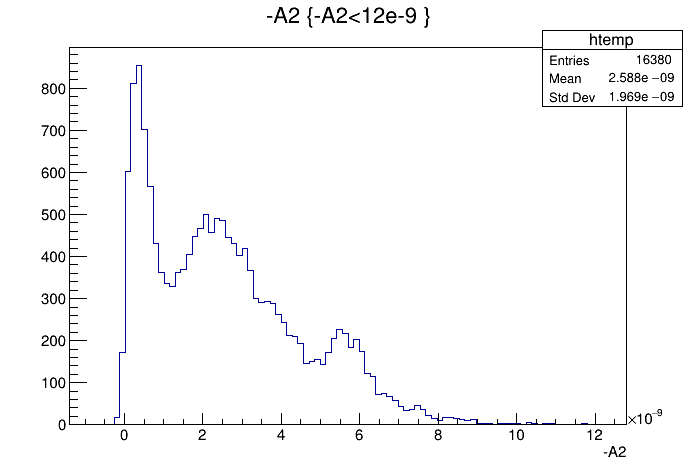

In [3]:
TCanvas* c = new TCanvas();
tree->Draw("-A2","-A2<12e-9 ", "colz");
c->Draw();

### Noise reduction
Once for all we show the noise reduction procedure we will follow on each set of measurements that allows to remove part of the unwanted events.

#### Cancel too high energy events

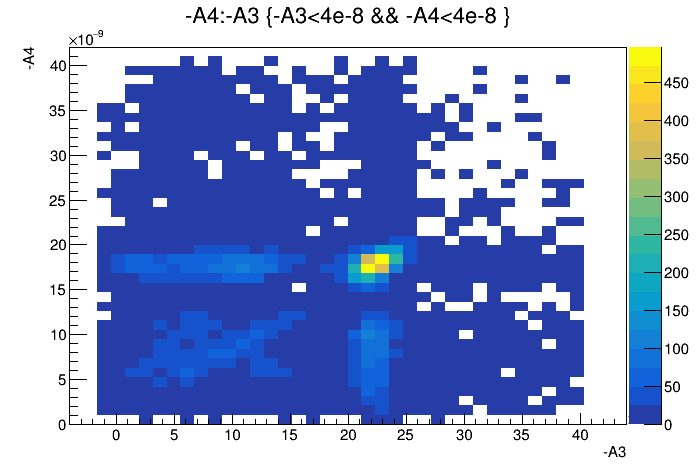

In [11]:
TString conditions =  "-A3<4e-8 && -A4<4e-8 ";

TCanvas* c = new TCanvas();
tree->Draw("-A4:-A3", conditions.Data() , "colz");
c->Draw();

#### Elimination of non in coincidence events
By looking at the area sum of the two NaI signals and their time differance we can get rid of non in coincidence events. 
**BEFOR**

In [100]:
TCanvas* c = new TCanvas();
tree->Draw("T32:T34", "-A3<6e-8 && -A4<6e-8 ", "colz");
c->Draw();

**AFTER**

In [25]:
TCanvas* c = new TCanvas();
tree->Draw("T32:T34", "-A3<4e-8 && -A4<4e-8 && T34!=0 && T32!=0 && abs(T34+5e-9)<10e-9 && abs(T32-5e-9)<15e-9 ", "colz");
c->Draw();

#### Saturation counts
By looking at the area by peak ratio we could detect the saturation counts.
**BEFOR**

In [28]:
TCanvas* c = new TCanvas();
tree->Draw("-A2/PK2:-A3/PK3","-A3<4e-8 && -A4<4e-8 && T34!=0 && T32!=0 && abs(T34+5e-9)<10e-9 &&abs(T32-5e-9)<15e-9", "colz");
c->Draw();

**AFTER**

In [78]:
// salvo la stringa finale  delle condizioni
TString cond = "-A3<4e-8 && -A4<4e-8 && T34!=0 && T32!=0 && abs(T34+5e-9)<10e-9 &&abs(T32-5e-9)<15e-9 &&-A2/PK2<0.11e-6&& -A3/PK3<0.3e-6";

TCanvas* c = new TCanvas();
tree->Draw("-A2/PK2:-A3/PK3",cond.Data(), "colz");
c->Draw();

### Fit to the known gaussian
This first time we show both the noise removed histogram (red) and the original one.

#### NaI1

In [79]:
TCanvas* c2 = new TCanvas();

TH1D* h1 = new TH1D("h1",";NaI1[V s];Events",400,0,30e-9);
tree->Draw("-A3>>h1",cond.Data());
tree->Draw("-A3","","same");
h1->SetLineColor(kRed+2);


TF1* f1 = new TF1("f1","[0]+gaus(1)+[4]*x",0,50e-9);
f1->SetParameter(0,0);
f1->SetParameter(1,30);
f1->SetParameter(2,20.e-9); //centro gaussiana
f1->SetParameter(3,1e-9); //sigma gaussiana
f1->SetParameter(4,-1e9);
h1->Fit("f1"," L", " ", 15e-9, 30e-9); //L:likelyhood 

gPad->SetLogy();
//h1->GetXaxis()->SetTitle("NaI2 (Vxs)");
double p1 = f1->GetParameter(2); //centro gaussiana
double ep1 = f1->GetParError(2); //suo errore
double s1 = f1->GetParameter(3); //sigma gaussiana
double es1 = f1->GetParError(3);  //suo errore

cout << "NaI1" <<endl;
cout << "511 keV @ " << p1 << "+-" << ep1 << endl;
cout << "sig @ 511 keV " << s1 << "+-" << es1 << endl;

c2->Draw()

 FCN=115.418 FROM MIGRAD    STATUS=CONVERGED    1143 CALLS        1144 TOTAL
                     EDM=1.90047e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   4.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.97024e+00   5.96650e-01  -4.19023e-04   1.63411e-04
   2  p1           7.40712e+01   1.86331e+00   2.06189e-04  -1.27146e-06
   3  p2           2.21062e-08   2.26942e-11  -5.30799e-15  -2.33699e+06
   4  p3           1.05425e-09   1.85851e-11  -1.19434e-14   7.24547e+05
   5  p4          -2.21098e+08   2.17676e+07   2.88624e+04   3.68159e-12
                               ERR DEF= 0.5
NaI1
511 keV @ 2.21062e-08+-2.26942e-11
sig @ 511 keV 1.05425e-09+-1.85851e-11


Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


#### NaI2

In [94]:
TCanvas* c2 = new TCanvas();

TH1D* h1 = new TH1D("h1",";NaI2[V s];Events",400,0,30e-9);
tree->Draw("-A4>>h1",cond);
tree->Draw("-A4","","same");
h1->SetLineColor(kRed+2);


TF1* f1 = new TF1("f1","[0]+gaus(1)+[4]*x",0,50e-9);
f1->SetParameter(0,0);
f1->SetParameter(1,30);
f1->SetParameter(2,15.e-9); //centro gaussiana
f1->SetParameter(3,1e-9); //sigma gaussiana
f1->SetParameter(4,-1e9);
h1->Fit("f1","L ", " ", 11e-9, 23e-9); //L:likelyhood 

gPad->SetLogy();
//h1->GetXaxis()->SetTitle("NaI2 (Vxs)");
double p1 = f1->GetParameter(2); //centro gaussiana
double ep1 = f1->GetParError(2); //suo errore
double s1 = f1->GetParameter(3); //sigma gaussiana
double e1 = f1->GetParError(3);  //suo errore

cout << "NaI1" <<endl;
cout << "511 keV@ " << p1 << "+-" << ep1 << endl;
cout << "sig @ 511 keV " << s1 << "+-" << e1 << endl;

c2->Draw()

 FCN=103.767 FROM MIGRAD    STATUS=CONVERGED     926 CALLS         927 TOTAL
                     EDM=2.98591e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.22942e+01   8.36672e-01   6.88795e-05   2.38597e-04
   2  p1           9.40648e+01   2.30207e+00  -2.32906e-03   2.31722e-05
   3  p2           1.75773e-08   1.85773e-11  -3.66806e-15  -8.00244e+05
   4  p3           8.82732e-10   1.51763e-11   1.90483e-14  -6.48539e+05
   5  p4          -5.02645e+08   4.10539e+07  -1.15280e+04   5.29958e-12
                               ERR DEF= 0.5
NaI1
511 keV@ 1.75773e-08+-1.85773e-11
sig @ 511 keV 8.82732e-10+-1.51763e-11


Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


In [99]:
TCanvas* c3 = new TCanvas();

TH1D* h12 = new TH1D("h12","",50,0,12e-9);
tree->Draw("-A2>>h12",cond+"&& abs(-A3-A4-38e-9)<1e-9", "colz");  //cosa è questa condizione???

TF1* f12 = new TF1("f12","[0]*exp(-x/[4]) + gaus(1)",0,50e-9);
f12->SetParameter(0,1);
f12->SetParameter(1,10);
f12->SetParameter(2,6e-9); //centro gaussiana
f12->SetParameter(3,2e-9); //sigma gaussiana
f12->SetParameter(4,2e-9);
h12->Fit("f12","L", " ", 3e-9, 9e-9); //L:likelyhood 
h12->GetXaxis()->SetTitle("LYSO (Vxs)");
double p12 = f12->GetParameter(2); //centro gaussiana
double ep12 = f12->GetParError(2); //suo errore
double s12 = f12->GetParameter(3); //sigma gaussiana
double e12 = f12->GetParError(3);  //suo errore

cout << "NaI2" <<endl;
cout << "511 keV@ " << p12 << "+-" << ep12 << endl;
cout << "sig @ 511 keV " << s12 << "+-" << e12 << endl;

c3->Draw();

 FCN=11.4332 FROM MIGRAD    STATUS=CONVERGED     454 CALLS         455 TOTAL
                     EDM=6.93658e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.91442e+01   1.14248e+01   8.99601e-03  -2.71149e-05
   2  p1           2.75273e+01   3.17748e+00   5.65918e-03  -8.36206e-05
   3  p2           5.77613e-09   7.36830e-11   1.54400e-13  -8.25908e+05
   4  p3           6.29668e-10   9.82688e-11   1.19427e-13  -4.48280e+06
   5  p4           2.91043e-09   5.55191e-10   3.98039e-13  -5.98084e+05
                               ERR DEF= 0.5
NaI2
511 keV@ 5.77613e-09+-7.3683e-11
sig @ 511 keV 6.29668e-10+-9.82688e-11


Warning in <TROOT::Append>: Replacing existing TH1: h12 (Potential memory leak).


# Calibration

In [108]:
// import of calibration data
TString Fname="SRC/NaI2_cal.dat";
TTree* tree = new TTree("tree","data from ascii file");
tree->ReadFile(Form("%s",Fname.Data()),"ene/F:cal/F:ecal/F:syscal/F:sig/F:esig/F");


In [113]:
tree->Draw("cal:ene:ecal+syscal:ene*0.001","","goff");
TGraphErrors* gra = new TGraphErrors(tree->GetSelectedRows(),tree->GetV2(),tree->GetV1(),tree->GetV4(),tree->GetV3());

TCanvas* c1 = new TCanvas();
gra->Draw("ap");
gra->SetMarkerStyle(8);
gra->SetLineWidth(2);
TF1* flin = new TF1("flin","pol1",0,1500);
gra->Fit("flin");
gra->GetXaxis()->SetTitle("Energy [keV]");
gra->GetYaxis()->SetTitle("NaI2 signal [Vxs]");

double p1=flin->GetParameter(1);
double p0=flin->GetParameter(0);
TCanvas* c2 = new TCanvas();

tree->Draw(Form("sig*%e:ene:(esig)*%e:ene*0.001",1/p1,1/p1),"","goff");
TGraphErrors* gra2 = new TGraphErrors(tree->GetSelectedRows(),tree->GetV2(),tree->GetV1(),tree->GetV4(),tree->GetV3());
gra2->Draw("ap");
gra2->SetMarkerStyle(8);
gra2->SetLineWidth(2);
TF1* fsig = new TF1("fsig","sqrt([1]*[1]*x+[0]*[0])",0,1500);
fsig->SetParameter(0,10);
fsig->SetParameter(1,5);

gra2->Fit("fsig");
gra2->GetXaxis()->SetTitle("Energy [keV]");
gra2->GetYaxis()->SetTitle("#sigma [keV]");

cout << "expected sigma@ 662 keV = " << fsig->Eval(662) << endl;
cout << "expected sigma@ 59.5 keV = " << fsig->Eval(59.5) << endl;

cout << "Alias ENaI2 " << Form("(-A2+%e)*%e",-p0,1./p1) << endl;

c1->Draw();
c2->Draw();

 FCN=991.742 FROM MIGRAD    STATUS=FAILED         53 CALLS          54 TOTAL
                     EDM=4.0339e+15    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.64525e-09   3.96149e-12   0.00000e+00   1.32734e+13
   2  p1           3.64932e-11   1.12629e-07   0.00000e+00  -1.12783e+15
 FCN=0.084817 FROM MIGRAD    STATUS=CONVERGED      34 CALLS          35 TOTAL
                     EDM=1.98807e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.59431e-01   1.95917e-02   9.96370e-06  -6.08187e-06
   2  p1           9.14189e-01   8.03422e-02   4.08604e-05   7.84850e-03
expected sigma@ 662 keV = 23.5372
expected sigma@ 59.5 keV = 7.10389
Alias ENaI2 (-A2+1.645248e-09)*2.7402

Warning in <Fit>: Abnormal termination of minimization.
